In [1]:
import pandas as pd

# Prepare each letter and corresponding info to load into dataframe
years = []
letters = []
wcs = []
with open('letters.txt', 'r', encoding='utf8') as file:
    for count, line in enumerate(file):
        years.append(count+1977)
        letters.append(line)

        # Find word count without numbers and punctuation
        word_count = 0
        words = line.split()
        for word in words: 
            if word.isalpha(): word_count += 1
        wcs.append(word_count)

# Load letters into dataframe
df = pd.DataFrame()
df['Year'] = years
df['Letter'] = letters
df['Word Count'] = wcs
df.head()

,Year,Letter,Word Count
0,1977,To the Stockholders of Berkshire Hathaway Inc....,2842
1,1978,To the Shareholders of Berkshire Hathaway Inc....,3978
2,1979,To the Shareholders of Berkshire Hathaway Inc....,6282
3,1980,To the Shareholders of Berkshire Hathaway Inc....,7007
4,1981,To the Shareholders of Berkshire Hathaway Inc....,6151


In [84]:
import nltk
import re

# Define list of stopwords and stemmer
stopwords = nltk.corpus.stopwords.words('english')
stemmer = nltk.stem.PorterStemmer()

# Process letters to get a list of words and a list of sentences
proc_words = []
proc_sents = []
for letter in letters:

    # Split letter into list of words
    words = letter.split()
    words = [word for word in words if word.isalpha()]  # Remove punctuation and numbers
    words = [word.lower() for word in words if word.lower() not in stopwords]  # Remove stopwords
    stem_words = []
    for word in words:  # Create list of stemmed words
        if stemmer.stem(word) in stem_words: continue
        else: stem_words.append(stemmer.stem(word))
    proc_words.append(stem_words)

    # Split letter into list of sentences and remove figures
    sents = nltk.sent_tokenize(letter)
    for sent in sents:
        if (re.search("\.+\.+\.+\.", sent)) is not None:
            del sents[sents.index(sent)]
    proc_sents.append(sent)

# Load list of words into dataframe for ease of access
df_words = pd.DataFrame()
df_words['Year'] = years
df_words['Letter'] = proc_words
df_words['Word Count'] = [len(letter) for letter in proc_words]

# Load list of sentences into dataframe
df_sents = pd.DataFrame()
df_sents['Year'] = years
df_sents['Letter'] = proc_sents
df_sents['Sentence Count'] = [len(letter) for letter in proc_sents]
df_sents.head()

,Year,Letter,Sentence Count
0,1977,[To the Stockholders of Berkshire Hathaway Inc...,128
1,1978,[To the Shareholders of Berkshire Hathaway Inc...,162
2,1979,[To the Shareholders of Berkshire Hathaway Inc...,251
3,1980,[To the Shareholders of Berkshire Hathaway Inc...,310
4,1981,[To the Shareholders of Berkshire Hathaway Inc...,281


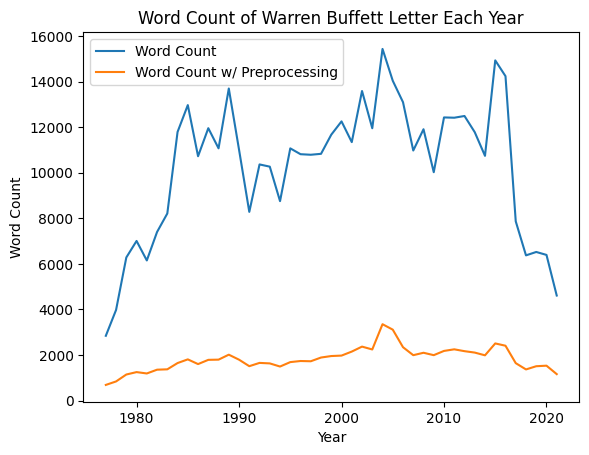

In [50]:
import matplotlib.pyplot as plt

# Plot hist of word counts
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(df['Year'], df['Word Count'], label='Word Count')
ax.plot(df_words['Year'], df_words['Word Count'], label='Word Count w/ Preprocessing')
ax.set_title('Word Count of Warren Buffett Letter Each Year')
ax.set_xlabel('Year')
ax.set_ylabel('Word Count')
ax.legend()

In [85]:
proc_sents[20]

['To the Shareholders of Berkshire Hathaway Inc. Our gain in net worth during 1997 was 8.0 billion which increased the per share book value of both our Class A and Class B stock by 34.1 .',
 'Over the last 33 years that is since present management took over per share book value has grown from 19 to 25 488 a rate of 24.1 compounded annually .',
 '1 1 .',
 "All figures used in this report apply to Berkshire's A shares the successor to the only stock that the company had outstanding before 1996 .",
 'The B shares have an economic interest equal to 1 30th that of the A .',
 'Given our gain of 34.1 it is tempting to declare victory and move on .',
 "But last year's performance was no great triumph Any investor can chalk up large returns when stocks soar as they did in 1997 .",
 'In a bull market one must avoid the error of the preening duck that quacks boastfully after a torrential rainstorm thinking that its paddling skills have caused it to rise in the world .',
 'A right thinking duck wo